# Capstone Project Two : Springboard Data Science career track

## 1. Project description

The continued expansion of the mobile phone market is inevitable. In the case of mixed mobile phone parameters, this project hopes to predict the price of mobile phones by establishing a model between mobile phone prices and various parameters. The purpose of this project is to determine the model that is easiest to predict the price of a mobile phone, and the parameters that have the greatest impact on the price of a mobile phone under this model. This is a regression problem. 

## 2. About the data


The dataset used in this project are all provided by Kaggle. This data is about the selling price and parameter information of Android phone. The main parameters are memory, running speed, mobile phone screen size and resolution, weight and so on. In this project, the price of the mobile phone will be the dependent variable, and other parameters will be the independent variable.The Nan item has been covered in preliminary processing of the data. Since there are too many categories in the catagorical variable, only the numerical variable in the dataset will be used in the prediction model. 

* Mobile_price 	     the price of mobile phone
* Dual_sim  	        can contain two sim card or not
* Resolution_multiply   screen resolution product of horizontal and vertical pixels
* Num_cores	        the core number of processor
* Mp_speed           measure of the speed of your CPU processing Unit: megabytes per second
* Int_memory 	        Mobile phone internal data storage capacity
* Ram 	           Random Access Memory
* Battery_power 	     Mobile phone battery capacity
* Mob_width 	        the width of mobile phone
* Mob_height	        the height of mobile phone
* Mob_depth	        the depth of mobile phone
* Disp_size_cm 		   the diagonally of mobile phone screen 

## 3.What do we intereted in?

* Which model has the best performance?
* Which festures is the most important for the mobile price?

## 4.Import necessary function

In [1]:
# import necessary library

import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib  import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [2]:
# Read dataset

df = pd.read_csv("E:/springboard/unit 18/df_cleaned.csv",index_col = 0)

In [3]:
df

,mobile_price,resolution_multiply,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm
0,8999,1152000,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56
1,8999,1152000,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56
2,9999,1152000,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56
3,9999,1152000,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56
4,11999,1152000,2.0,128,4,5000,75.4,164.4,9.00,199.0,16.51
...,...,...,...,...,...,...,...,...,...,...,...
454,13490,1036800,2.5,32,3,3180,73.1,150.5,7.70,143.0,14.48
455,9490,1036800,2.5,16,2,3180,73.1,150.5,7.70,143.0,14.48
456,22990,2462400,2.0,64,4,3400,75.3,156.0,7.80,158.0,15.82
457,13990,2527200,2.1,128,4,4020,76.1,162.0,8.30,188.0,16.59


In [4]:
features = list(df.columns)
del features[0]

In [5]:
# Define X,y

X = df[features]
y = df["mobile_price"]

In [6]:
print(X)

     resolution_multiply  mp_speed  int_memory  ram  battery_power  mob_width  \
0                1152000       2.0          32    3           5000       75.0   
1                1152000       2.0          32    3           5000       75.0   
2                1152000       2.0          64    4           5000       75.0   
3                1152000       2.0          64    4           5000       75.0   
4                1152000       2.0         128    4           5000       75.4   
..                   ...       ...         ...  ...            ...        ...   
454              1036800       2.5          32    3           3180       73.1   
455              1036800       2.5          16    2           3180       73.1   
456              2462400       2.0          64    4           3400       75.3   
457              2527200       2.1         128    4           4020       76.1   
458              2527200       2.1         128    4           4020       76.1   

     mob_height  mob_depth 

## 5. Training the data with different model

In [7]:
# Split X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [9]:
def rmse(prediction, actual):
    return np.sqrt(((prediction - actual) ** 2).mean())

In [10]:
# LinearRegression

from sklearn.linear_model import LinearRegression

Linear = LinearRegression()
Linear.fit(X_train,y_train)
y_predict_linear = Linear.predict(X_test)
Accuracy_linear = Linear.score(X_test,y_test)
print("The LogisticRegression model accuarcy score is " + str(round(Accuracy_linear,3)))

mse_linear = mean_squared_error(y_test,y_predict_linear)
print("The mean squared error is " + str(round(mse_linear,3)))

rm_linear = rmse(y_test,y_predict_linear)
print("The root mean square error is " + str(round(rm_linear,3)))

The LogisticRegression model accuarcy score is 0.698
The mean squared error is 22049177.487
The root mean square error is 4695.655


In [11]:
# LassoRegression

from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_predict_lasso = lasso.predict(X_test)
print("The lasso intercept of this model is " + str(round(lasso.intercept_,3)))

Accuracy_lasso = lasso.score(X_test,y_test)
print("The LassoRegression accuarcy score is " + str(round(Accuracy_lasso,3)))

mse_lasso = mean_squared_error(y_test,y_predict_lasso)
print("The mean squared error is " + str(round(mse_lasso,3)))

rm_lasso = rmse(y_test,y_predict_lasso)
print("The root mean quare error is " + str(round(rm_lasso,3)))



The lasso intercept of this model is 29562.97
The LassoRegression accuarcy score is 0.698
The mean squared error is 22046334.44
The root mean quare error is 4695.352


In [12]:
# RidgeRegression

from sklearn.linear_model import Ridge
# training model with 0.5 alpha value
ridge = Ridge(alpha = 1.0, normalize = False, tol = 0.001,solver ='auto', random_state = 42)
ridge.fit(X_train, y_train)
  
y_predict_ridge = ridge.predict(X_test)
  
Accuracy_ridge = ridge.score(X_test, y_test)
print("The RidgeRgression model score is " + str(round(Accuracy_ridge,3)))

mse_ridge = mean_squared_error(y_test,y_predict_ridge)
print("The mean squared error is " + str(round(mse_ridge,3)))

rm_ridge = rmse(y_test,y_predict_ridge)
print("The root mean square error is " + str(round(rm_ridge,3)))

The RidgeRgression model score is 0.695
The mean squared error is 22244427.356
The root mean square error is 4716.4


C:\Users\lv164\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [13]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)

y_predict_rf = randomforest.predict(X_test)
Accuracy_rf = randomforest.score(X_test,y_test)
print("The RandomForestRegression model accuracy score is " + str(round(Accuracy_rf,3)))

mse_rf = mean_squared_error(y_test,y_predict_rf)
print("The mean squared error is " + str(round(mse_rf,3)))

rm_rf = rmse(y_test,y_predict_rf)
print("The root-mean-square error is " + str(round(rm_rf,3)))

The RandomForestRegression model accuracy score is 0.947
The mean squared error is 3872115.67
The root-mean-square error is 1967.769


In [14]:
# KNeighborsRegression

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

y_predict_knn = knn.predict(X_test)
Accuracy_knn = knn.score(X_test,y_test)
print("The KNeighborsRegression model accuracy score is " + str(round(Accuracy_knn,3)))

mse_knn = mean_squared_error(y_test,y_predict_knn)
print("The mean squared error is " + str(round(mse_knn,3)))

rm_knn = rmse(y_test,y_predict_knn)
print("The root mean square error is " + str(round(rm_knn,3)))

The KNeighborsRegression model accuracy score is 0.758
The mean squared error is 17667454.663
The root mean square error is 4203.267


In [15]:
# SVM 
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train.astype("int"))

y_predict_svm = svm.predict(X_test)
Accuracy_svm = svm.score(X_test,y_test)
print("The svm model accuracy score is " + str(round(Accuracy_knn,3)))

mse_svm = mean_squared_error(y_test,y_predict_svm)
print("The mean squared error is " + str(round(mse_svm,3)))

rm_svm = rmse(y_test,y_predict_svm)
print("The root mean square error is " + str(round(rm_svm,3)))

The svm model accuracy score is 0.758
The mean squared error is 79391559.81
The root mean square error is 8910.194


In [16]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gradient = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gradient.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gradient.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gradient.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.574
Accuracy score (validation): 0.535

Learning rate:  0.1
Accuracy score (training): 0.745
Accuracy score (validation): 0.692

Learning rate:  0.25
Accuracy score (training): 0.866
Accuracy score (validation): 0.833

Learning rate:  0.5
Accuracy score (training): 0.912
Accuracy score (validation): 0.866

Learning rate:  0.75
Accuracy score (training): 0.923
Accuracy score (validation): 0.859

Learning rate:  1
Accuracy score (training): 0.915
Accuracy score (validation): 0.869



In [17]:
# Gradient Boosting (2)

gradient = GradientBoostingRegressor(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gradient.fit(X_train, y_train)
y_predict_gradient = gradient.predict(X_test)

Accuracy_gradient = gradient.score(X_test,y_test)
print("The Gradient Boosting accuracy score is " + str(round(Accuracy_gradient,3)))

mse_gradient = mean_squared_error(y_test,y_predict_gradient)
print("The mean squared error is " + str(round(mse_gradient,3)))

rm_gradient = rmse(y_test,y_predict_gradient)
print("The root mean square error is " + str(round(rm_gradient,3)))

The Gradient Boosting accuracy score is 0.869
The mean squared error is 9574369.173
The root mean square error is 3094.248


## 6. Model result summary 

In [18]:

from tabulate import tabulate
table = [["Model","Accuarcy score","MSE","RMSE"],
         ["LogisticRegression",Accuracy_linear, mse_linear, rm_linear],
         ["LassoRegression",Accuracy_lasso, mse_lasso, rm_lasso],
         ["RidgeRegression",Accuracy_ridge, mse_ridge, rm_ridge],
         ["RandomForestRegressor", Accuracy_rf, mse_rf, rm_rf],
         ["KNeighborsRegression", Accuracy_knn, mse_knn, rm_knn],
         ["SVM", Accuracy_svm, mse_svm, rm_svm],
         ["Gradient Boosting",Accuracy_gradient, mse_gradient, rm_gradient ]
    
]

print(tabulate(table, headers='firstrow', tablefmt='grid'))


+-----------------------+------------------+-------------+---------+
| Model                 |   Accuarcy score |         MSE |    RMSE |
+=======================+==================+=============+=========+
| LogisticRegression    |        0.697938  | 2.20492e+07 | 4695.66 |
+-----------------------+------------------+-------------+---------+
| LassoRegression       |        0.697977  | 2.20463e+07 | 4695.35 |
+-----------------------+------------------+-------------+---------+
| RidgeRegression       |        0.695263  | 2.22444e+07 | 4716.4  |
+-----------------------+------------------+-------------+---------+
| RandomForestRegressor |        0.946954  | 3.87212e+06 | 1967.77 |
+-----------------------+------------------+-------------+---------+
| KNeighborsRegression  |        0.757965  | 1.76675e+07 | 4203.27 |
+-----------------------+------------------+-------------+---------+
| SVM                   |       -0.0876213 | 7.93916e+07 | 8910.19 |
+-----------------------+---------

The RandomForestRegressor model has 93% accuarcy rate and very low rmse. The accuracy is much higher than other model, hence, we will
take RandomForestRegressor model as the main predict model. At next step, we will use GridsearchCV and asign hyperparameter to modify 
the model performance again.

## 7. Gridsearch/hyperparameter

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# Gridsearch for RandomFroest
gird_rf = RandomForestRegressor()
param_grid = {"criterion" : ["squared_error", "absolute_error"], 
              "max_features" : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2, 4, 8, 16],
              "n_estimators" : [10, 50, 150]
             }

gs = GridSearchCV(estimator=gird_rf, param_grid=param_grid)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestRegressor(max_features='sqrt', n_estimators=50)
0.9165038259712966


In [21]:
gs.best_params_

{'criterion': 'squared_error',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [22]:
randomforest_grid = RandomForestRegressor(criterion = "squared_error",max_features =  "log2", 
                                           min_samples_split=2, n_estimators=150)
randomforest_grid.fit(X_train, y_train)
y_predict_grid = randomforest_grid.predict(X_test)
Accuracy_grid = randomforest_grid.score(X_test,y_test)
print("The RandomForestRegression model accuracy score is " + str(round(Accuracy_grid,5)))

mse_grid = mean_squared_error(y_test,y_predict_rf)
print("The mean squared error is " + str(round(mse_grid,5)))

rm_grid = rmse(y_test,y_predict_rf)
print("The root-mean-square error is " + str(round(rm_grid,5)))

The RandomForestRegression model accuracy score is 0.95048
The mean squared error is 3872115.67009
The root-mean-square error is 1967.76921


In [23]:
table = [["Model","Accuarcy score","MSE","RMSE"],
         ["RandomForestRegressor", Accuracy_rf, mse_rf, rm_rf],
         ["RandomForestRegressor_gird", Accuracy_grid, mse_grid, rm_grid]    
        ]

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------------------------+------------------+-------------+---------+
| Model                      |   Accuarcy score |         MSE |    RMSE |
+============================+==================+=============+=========+
| RandomForestRegressor      |         0.946954 | 3.87212e+06 | 1967.77 |
+----------------------------+------------------+-------------+---------+
| RandomForestRegressor_gird |         0.950477 | 3.87212e+06 | 1967.77 |
+----------------------------+------------------+-------------+---------+


## 8. Features importance 

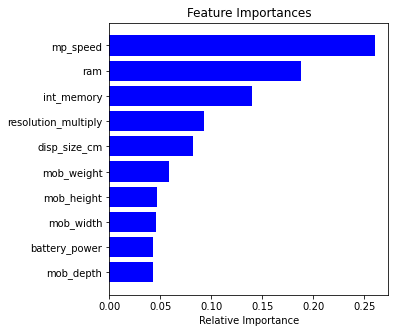

In [24]:
plt.subplots(figsize=(5,5))
importance = randomforest_grid.feature_importances_
indices = np.argsort(importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 9. Conclusion 

In order to identify the parameters most likely to affect the price of the phone and predict the phone price, we have used serveral models:
* LogisticRegression
* LassoRegression
* RidgeRegression
* RandomForestRegressor
* KNeighborsRegression
* SVM
* Gradient Boosting

From the result, the random forest model has the significant higer accuarce rate (93.6%) than other model. So first we define use it as the predict model. Then we use GridSearch method further improved accuracy to 95.4%. Under this result, the importance test shows three most importance feature realted to mobile phone price are: Ram, Mp_speed and int_memoray.The feature importance score of Ram and Mp_speed are over 0.2.The results clearly show that the most important factor in determining the price of a phone is the performance of its processor, from speed to cache. They involve the core functions of the phone, and the Central Processing Unit is still the most important than other parameters that affect appearance (resolution, height, weight) or battery life (battery power). 